## FLIGHT PRICE PREDICTION

### Problem Statement:

**Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -**
**1. Time of purchase patterns (making sure last-minute purchases are expensive)**

**2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases).**

**So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.**
    

Aim : 

**Analysis**

You have to do some analysis on the data.
* Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time?
* What is the best time to buy so that the consumer can save the most by taking the least risk?
* Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?

**Model Building**

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the bestmodel.


**Dataset** : We have 8700 records of flight ticket with 9 features about the flight ticket along with the flight fare. The dataset includes the flight prices of flight tickets for the month of August 2022.

In [57]:
#importing dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("flight_data.csv")
data

,Airline_name,Date_of_journey,Source,Destination,Dep_time,Arr_time,Duration,Total_stops,Ticket_price
0,AIR INDIA,"Mon, 01 Aug",New Delhi,Mumbai,10:00,12:35,2hr 35min,non-stop,5955
1,AIR INDIA,"Mon, 01 Aug",New Delhi,Mumbai,21:15,23:35,2hr 20min,non-stop,5955
2,AIR INDIA,"Mon, 01 Aug",New Delhi,Mumbai,14:00,16:15,2hr 15min,non-stop,5955
3,GO FIRST,"Mon, 01 Aug",New Delhi,Mumbai,05:20,15:10,9hr 50min,1 stop,7108
4,GO FIRST,"Mon, 01 Aug",New Delhi,Mumbai,17:05,23:55,6hr 50min,1 stop,7108
...,...,...,...,...,...,...,...,...,...
8695,AIRASIA INDIA,"Mon, 29 Aug",Cochin,Bengaluru,22:55,00:05,1hr 10min,non-stop,3494
8696,ALLIANCE AIR,"Mon, 29 Aug",Cochin,Bengaluru,15:30,17:55,2hr 25min,1 stop,3494
8697,INDIGO,"Mon, 29 Aug",Cochin,Bengaluru,05:45,06:45,1hr,non-stop,4123
8698,AIR INDIA,"Mon, 29 Aug",Cochin,Bengaluru,20:10,07:50,11hr 40min,1 stop,9059


### Exploratory Data Analysis

In [58]:
data.shape

(8700, 9)

We have 8700 rows and 9 columns in the dataset.

In [59]:
data.dtypes

Airline_name       object
Date_of_journey    object
Source             object
Destination        object
Dep_time           object
Arr_time           object
Duration           object
Total_stops        object
Ticket_price        int64
dtype: object

We have string and integer type of data in the dataset.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline_name     8700 non-null   object
 1   Date_of_journey  8700 non-null   object
 2   Source           8700 non-null   object
 3   Destination      8700 non-null   object
 4   Dep_time         8700 non-null   object
 5   Arr_time         8700 non-null   object
 6   Duration         8700 non-null   object
 7   Total_stops      8700 non-null   object
 8   Ticket_price     8700 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 611.8+ KB


We have 8700 non null values in all the columns of the dataset.

In [61]:
data.columns

Index(['Airline_name', 'Date_of_journey', 'Source', 'Destination', 'Dep_time',
       'Arr_time', 'Duration', 'Total_stops', 'Ticket_price'],
      dtype='object')

### Features in Dataset(Independent Variable)

`Airline_name` = Name of the airline 

`Date_of_journey` = Date of the journey

`Source` = Source place of the journey

`Destination` = Destination place of the journey

`Dep_time` = Departure time

`Arr_time` = Arrival Time

`Duration` = Total travel duration

`Total_stops` = Total stops

### Target in dataset(Dependent Variable)

`Ticket_price` = Price of Flight Ticket

### Exploring the Categorical Variables in the dataset

In [62]:
#Categorical columns in the dataset
for i in data.columns:
    if data[i].dtypes =='O':
        print(i)
        print('*'*50)
        print(data[i].nunique())
        print(data[i].unique())
        missing = data[i].isnull().sum()
        print("Missing Value Count : ",missing)
        total = 1168
        missing_per = (missing/total)*100
        print("Missing Data Percent : ",missing_per)
        print("^"*50)

Airline_name
**************************************************
7
['AIR INDIA' 'GO FIRST' 'AIRASIA INDIA' 'SPICEJET' 'INDIGO' 'VISTARA'
 'ALLIANCE AIR']
Missing Value Count :  0
Missing Data Percent :  0.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Date_of_journey
**************************************************
29
['Mon, 01 Aug' 'Tue, 02 Aug' 'Wed, 03 Aug' 'Thu, 04 Aug' 'Fri, 05 Aug'
 'Sat, 06 Aug' 'Sun, 07 Aug' 'Mon, 08 Aug' 'Tue, 09 Aug' 'Wed, 10 Aug'
 'Thu, 11 Aug' 'Fri, 12 Aug' 'Sat, 13 Aug' 'Sun, 14 Aug' 'Mon, 15 Aug'
 'Tue, 16 Aug' 'Wed, 17 Aug' 'Thu, 18 Aug' 'Fri, 19 Aug' 'Sat, 20 Aug'
 'Sun, 21 Aug' 'Mon, 22 Aug' 'Tue, 23 Aug' 'Wed, 24 Aug' 'Thu, 25 Aug'
 'Fri, 26 Aug' 'Sat, 27 Aug' 'Sun, 28 Aug' 'Mon, 29 Aug']
Missing Value Count :  0
Missing Data Percent :  0.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Source
**************************************************
5
['New Delhi' 'Mumbai' 'Chennai' 'Bengaluru' 'Cochin']
Missing Value Count :  0
Missing Data Perc

In the column date of journey we have the date for the month of August. So we can add new columns 'Day' and 'Week_day'.

In [63]:
data['Week_day'] = data['Date_of_journey']
data['Day'] = data['Date_of_journey']
for i in range(0,len(data['Date_of_journey'])):
    data['Week_day'][i] = data['Date_of_journey'][i][:3]

for i in range(0,len(data['Date_of_journey'])):
    data['Day'][i] = data['Date_of_journey'][i][5:7]
data['Day'] = data['Day'].astype('int64')

The columns ['Dep_time', 'Arr_time'] are not in date time format. We can convert the data in these columns to date time format.

In [64]:
data['Dep_time'] = pd.to_datetime(data['Dep_time'])
data['Arr_time'] = pd.to_datetime(data['Arr_time'])

We can separate the hour and minute from the columns ['Dep_time', 'Arr_time'] to new columns.

In [65]:
data['Dep_time_hour'] = data['Dep_time'].dt.hour
data['Dep_time_min'] = data['Dep_time'].dt.minute

data['Arr_time_hour'] = data['Arr_time'].dt.hour
data['Arr_time_min'] = data['Arr_time'].dt.minute

We can also convert the data in column 'Duration' to minutes for convenience.

In [66]:
import numpy as np
import datetime


#Changing the format of the values for timedelta
for i in range(0,len(data.Duration)):
    data.Duration[i] = data.Duration[i].replace('hr',':').replace(' ','').replace('min',':00')

#Changing the datatype to timedelta
data['Duration'] = pd.to_timedelta(np.where(data['Duration'].str.count(':') ==1, data['Duration']+'00:00',data['Duration']))

#Converting the value to minutes
for i in range(0,len(data.Duration)):
    data.Duration[i] = (data.Duration[i].total_seconds())/60
    
data['Duration'] = data['Duration'].astype('int64')

We can drop the column ['Date_of_journey', 'Dep_time', 'Arr_time']  from the dataset as we have already created separate columns from the same data.

In [67]:
data.drop(['Date_of_journey','Dep_time', 'Arr_time'], axis = 1, inplace = True)

In [68]:
print(data.dtypes)
data

Airline_name     object
Source           object
Destination      object
Duration          int64
Total_stops      object
Ticket_price      int64
Week_day         object
Day               int64
Dep_time_hour     int64
Dep_time_min      int64
Arr_time_hour     int64
Arr_time_min      int64
dtype: object


,Airline_name,Source,Destination,Duration,Total_stops,Ticket_price,Week_day,Day,Dep_time_hour,Dep_time_min,Arr_time_hour,Arr_time_min
0,AIR INDIA,New Delhi,Mumbai,155,non-stop,5955,Mon,1,10,0,12,35
1,AIR INDIA,New Delhi,Mumbai,140,non-stop,5955,Mon,1,21,15,23,35
2,AIR INDIA,New Delhi,Mumbai,135,non-stop,5955,Mon,1,14,0,16,15
3,GO FIRST,New Delhi,Mumbai,590,1 stop,7108,Mon,1,5,20,15,10
4,GO FIRST,New Delhi,Mumbai,410,1 stop,7108,Mon,1,17,5,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...
8695,AIRASIA INDIA,Cochin,Bengaluru,70,non-stop,3494,Mon,29,22,55,0,5
8696,ALLIANCE AIR,Cochin,Bengaluru,145,1 stop,3494,Mon,29,15,30,17,55
8697,INDIGO,Cochin,Bengaluru,60,non-stop,4123,Mon,29,5,45,6,45
8698,AIR INDIA,Cochin,Bengaluru,700,1 stop,9059,Mon,29,20,10,7,50


Now the dataset is having 12 columns including the target variable.

### Checking for Missing Values

Airline_name     0
Source           0
Destination      0
Duration         0
Total_stops      0
Ticket_price     0
Week_day         0
Day              0
Dep_time_hour    0
Dep_time_min     0
Arr_time_hour    0
Arr_time_min     0
dtype: int64


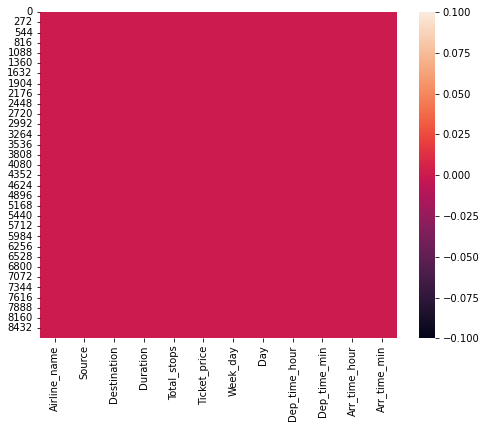

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [8,6])
sns.heatmap(data.isnull())
print(data.isnull().sum().sort_values(ascending = False))

We don't have any missing values in the dataset.

### Data Visualization

### Univariate Analysis

INDIGO           3961
AIRASIA INDIA    2118
GO FIRST          806
VISTARA           802
AIR INDIA         697
SPICEJET          242
ALLIANCE AIR       74
Name: Airline_name, dtype: int64


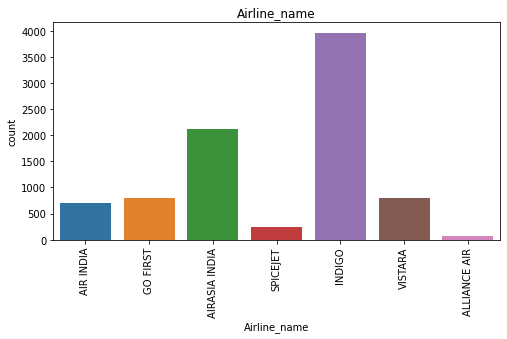

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
New Delhi    2025
Chennai      1740
Bengaluru    1740
Cochin       1740
Mumbai       1455
Name: Source, dtype: int64


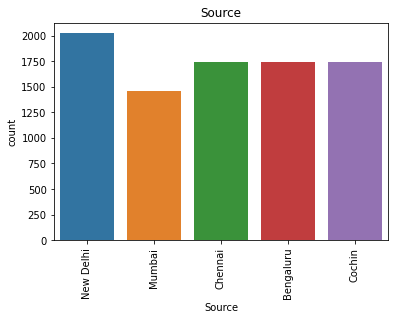

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Mumbai       1740
Chennai      1740
Bengaluru    1740
Cochin       1740
New Delhi    1740
Name: Destination, dtype: int64


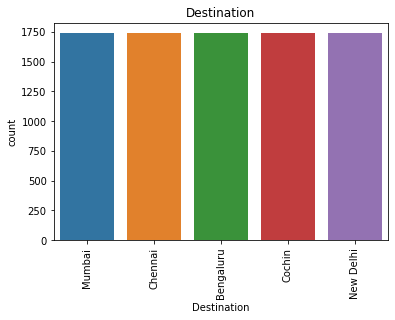

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
non-stop    5869
1 stop      2803
2 stops       28
Name: Total_stops, dtype: int64


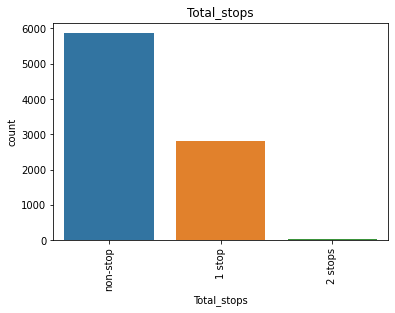

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Mon    1500
Tue    1200
Wed    1200
Thu    1200
Fri    1200
Sat    1200
Sun    1200
Name: Week_day, dtype: int64


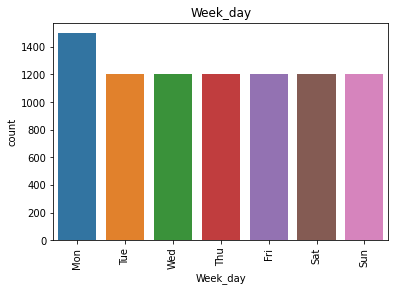

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [70]:
#plotting the categorical variables in the dataset.
plt.figure(figsize = [8,4])
for i in data.columns:
    if (data[i].dtypes =='O'):
        a = 0
        print(data[i].value_counts().sort_values(ascending = False))
        plt.subplot(1,1,a+1)
        sns.countplot(data[i])
        plt.xticks(rotation = 90)
        plt.title("{}".format(i))
        plt.show()
        print("^"*60)
        a+= 1

**Observations:**
    
* Most of the flights in the dataset are of Indigo Airlines. Second highest flights in the dataset are of AirAsia India Airlines. 
* Most of the flights are taking off from New Delhi airport while the least number of flights are taking off from the Mumbai Airport.
* We have 5 destination airports in the dataset. We don't have any difference in the number of data for the flights which are landing off in these cities.
* Most of the flights in the dataset are having no stop in between the journey. 
* Most of the flights are having the journey on Monday compared to other weekdays.

(array([7677,  805,   58,    0,   29,  131], dtype=int64), array([  60.,  600., 1140., 1680., 2220., 2760., 3300.]))


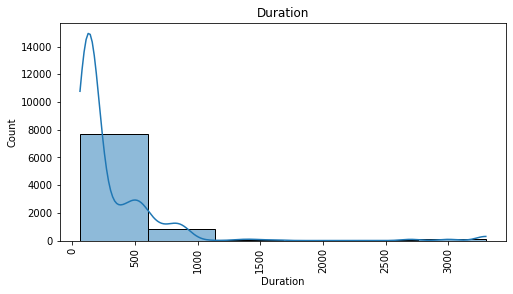

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(array([2462, 3703, 1469,  976,   71,   19], dtype=int64), array([ 2812.        ,  4706.33333333,  6600.66666667,  8495.        ,
       10389.33333333, 12283.66666667, 14178.        ]))


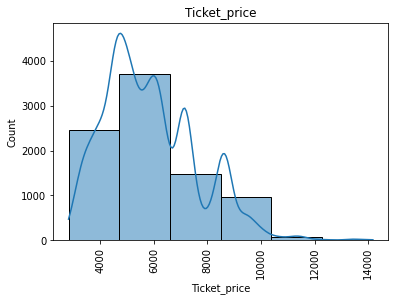

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(array([1500, 1500, 1200, 1500, 1500, 1500], dtype=int64), array([ 1.        ,  5.66666667, 10.33333333, 15.        , 19.66666667,
       24.33333333, 29.        ]))


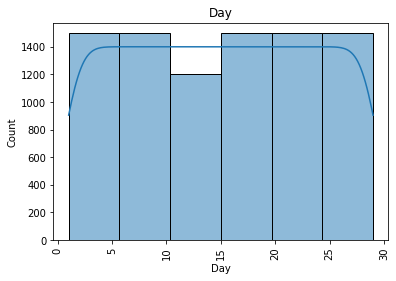

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(array([ 147, 1897, 1779, 1418, 1626, 1833], dtype=int64), array([ 0.        ,  3.83333333,  7.66666667, 11.5       , 15.33333333,
       19.16666667, 23.        ]))


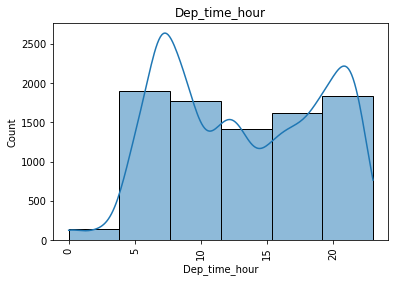

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(array([2126, 1107, 1057, 1584, 1578, 1248], dtype=int64), array([ 0.        ,  9.16666667, 18.33333333, 27.5       , 36.66666667,
       45.83333333, 55.        ]))


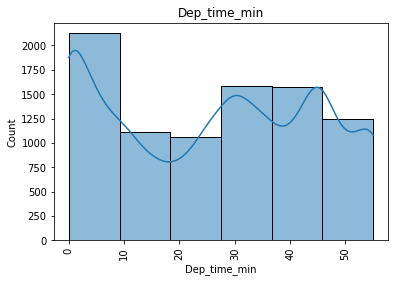

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(array([ 575,  916, 1882, 1273, 1542, 2512], dtype=int64), array([ 0.        ,  3.83333333,  7.66666667, 11.5       , 15.33333333,
       19.16666667, 23.        ]))


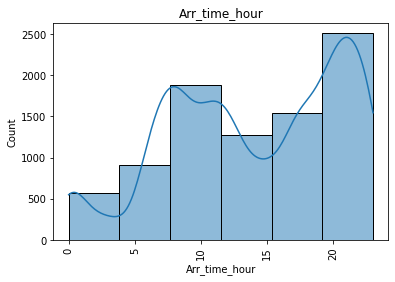

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(array([ 965, 1745, 1691, 1053, 1457, 1789], dtype=int64), array([ 0.        ,  9.16666667, 18.33333333, 27.5       , 36.66666667,
       45.83333333, 55.        ]))


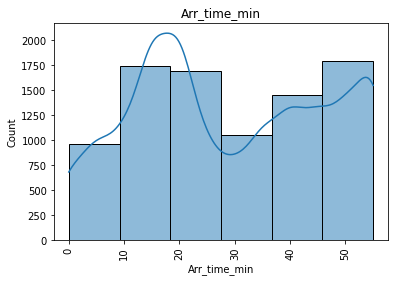

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [71]:
#plotting the numerical variables in the dataset. 
plt.figure(figsize = [8,4])
for i in data.columns:
    if (data[i].dtypes =='int64' or data[i].dtypes == 'float64'):
        a = 0
        plt.subplot(1,1,a+1)
        sns.histplot(x =i,data = data,bins =6,kde=True)
        np.set_printoptions(suppress = True)
        print(np.histogram(data[i],bins=6))
        plt.xticks(rotation = 90)
        plt.title("{}".format(i))
        ax = plt.gca()
        ax.ticklabel_format(style='plain')
        plt.show()
        print("^"*60)
        a+= 1

**Observations:**

* Most of the flights are having a duration time between 60 to 600 minutes.
* Most of the flights tickets are having a flight fare between the range Rs 4700 to Rs. 6600.
* The number of flights which are having higher number of journeys are during the beginning and end of a month. The number of flights between the 10th and 15th day of month is comparatively less.
* The number of flights which are taking off between 12.00 AM to 4.00 AM is comparatively less compared to other hours during the day. Rest of the hours in a day are having similar number of flight departure time.
* Most of the flights are taking off in first 10 minutes of any hour for a day.
* Most number of flights are landing off between the 07.00 PM. to 11.59 PM for a day.
* As per the dataset, the number of flights which are landing off between 10 to 28 minutes and 45 to 59 minutes of an hour is more compared to other time intervals of any hour in a day.

#### Bivariate and Multivariate Analysis

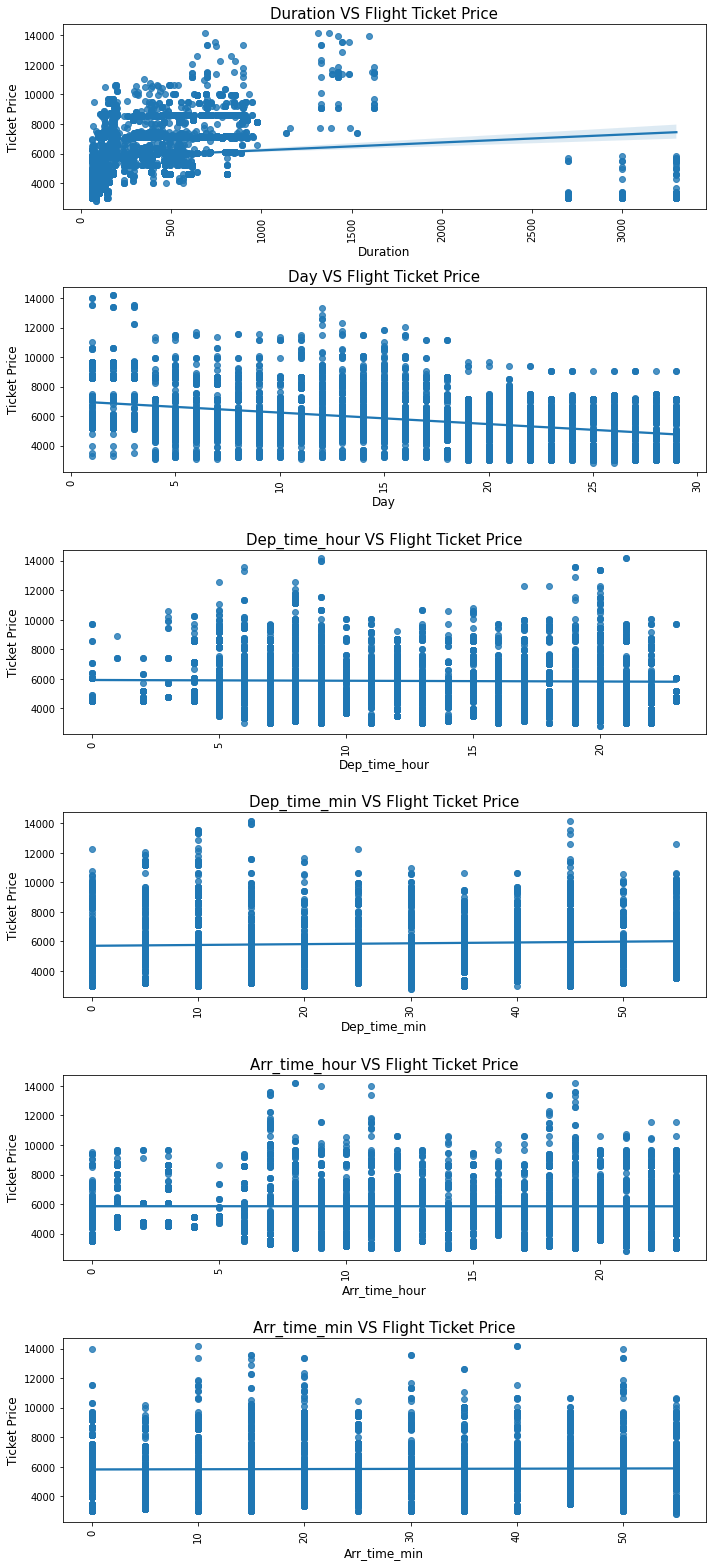

In [72]:
numeric_columns = list(data.drop(['Ticket_price'],axis =1).select_dtypes(["int64","float64"]))
plt.figure(figsize = [10,25])
for i in range (len(numeric_columns)):
    plt.subplot(7,1,i+1)
    sns.regplot(x = data[numeric_columns[i]],y = data['Ticket_price'], data = data)
    plt.xticks(rotation = 90)
    plt.title(f"{numeric_columns[i]} VS Flight Ticket Price",fontsize=15)
    plt.xlabel(numeric_columns[i],fontsize = 12)
    plt.ylabel('Ticket Price', fontsize = 12)
    ax = plt.gca()
    ax.ticklabel_format(style='plain')
    plt.tight_layout()

#### Observations:

* The flight journey duration is having a slight impact to the increase in flight ticket price. But the data is not uniform between the each interval of duration.
* The day of flight journey in a month is having a slight impact to the decrease in flight ticket price. The flight ticket price is higher during the start of month compared to the flight ticket price end of month. So it is better to travel in flights during the end of month than the beginning of the month.
* The flight ticket price is higher between 05.00 AM to 10.00 A.M and between 05.00 PM to 09.00 PM of the day. The flight price is low for the rest of the hours in a day. So it is better to choose a flight which is not in the busy hours.
* The flight ticket price is higher for flights which are taking off at 10,15 and 45 minutes of an hour of any day
* The flight ticket price is higher if the flight is arriving at the destination between 06.00 AM to 11.00 AM and 06.00 PM to 07.00 PM of a day.
* The arriving time minute of a flight is not having much impact on the price of flight ticket as the price is almost uniform in different interval of minutes of hours in a day.

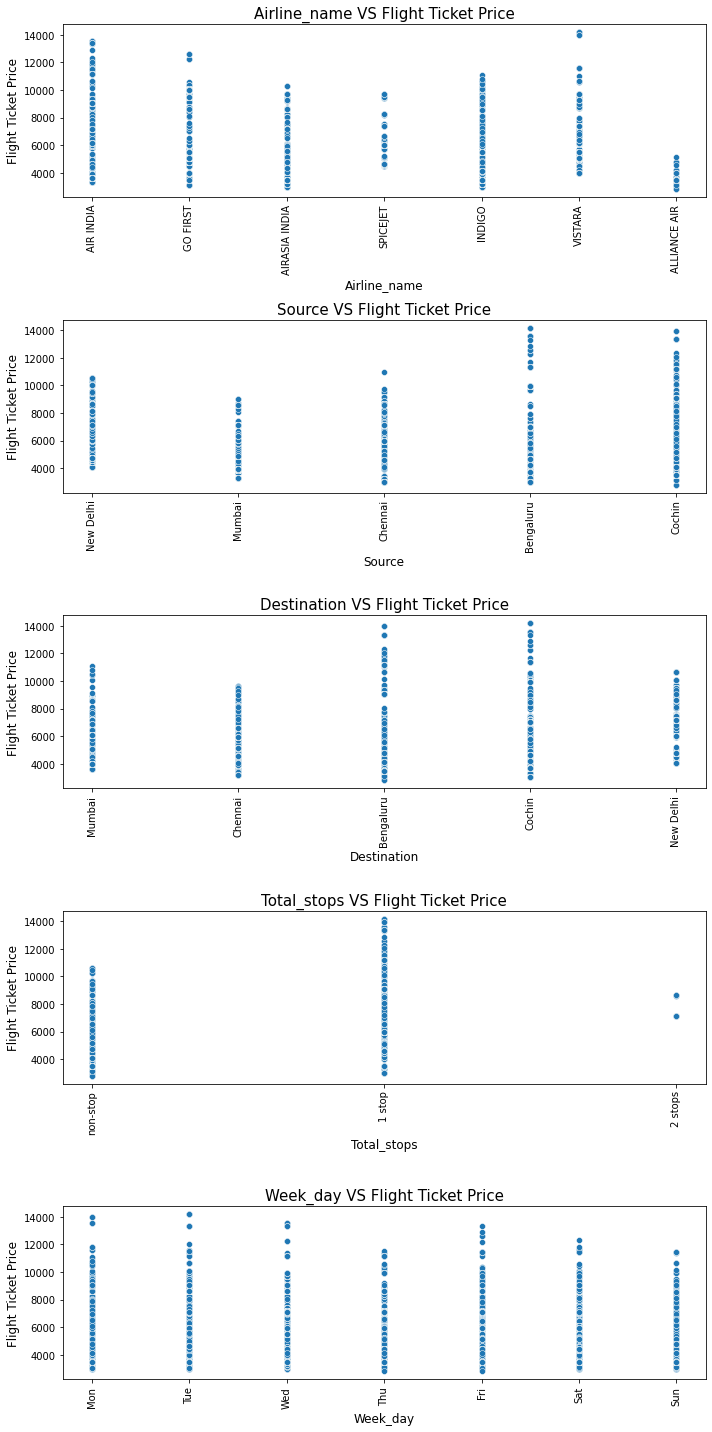

In [73]:
categorical_column = list(data.select_dtypes("O"))
plt.figure(figsize = [10,20])
for i in range (len(categorical_column)):
    plt.subplot(5,1,i+1)
    sns.scatterplot(x = data[categorical_column[i]],y = data['Ticket_price'], data = data)
    plt.xticks(rotation = 90)
    plt.title(f"{categorical_column[i]} VS Flight Ticket Price",fontsize=15)
    plt.xlabel(categorical_column[i],fontsize = 12)
    plt.ylabel('Flight Ticket Price', fontsize = 12)
    plt.tight_layout()

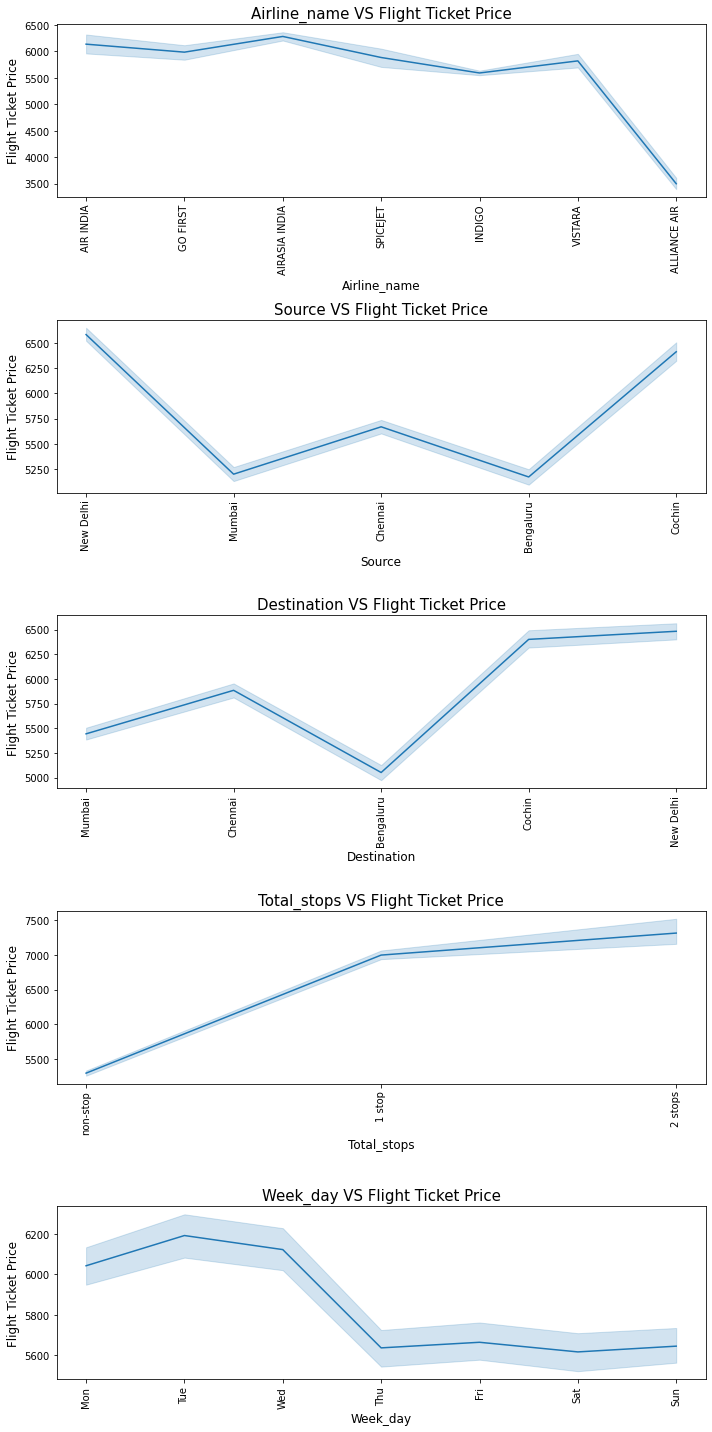

In [74]:
categorical_column = list(data.select_dtypes("O"))
plt.figure(figsize = [10,20])
ax = plt.gca()
ax.ticklabel_format(style='plain')
for i in range (len(categorical_column)):
    plt.subplot(5,1,i+1)
    sns.lineplot(x = data[categorical_column[i]],y = data['Ticket_price'], data = data)
    plt.xticks(rotation = 90)
    plt.title(f"{categorical_column[i]} VS Flight Ticket Price",fontsize=15)
    plt.xlabel(categorical_column[i],fontsize = 12)
    plt.ylabel('Flight Ticket Price', fontsize = 12)
    plt.tight_layout()

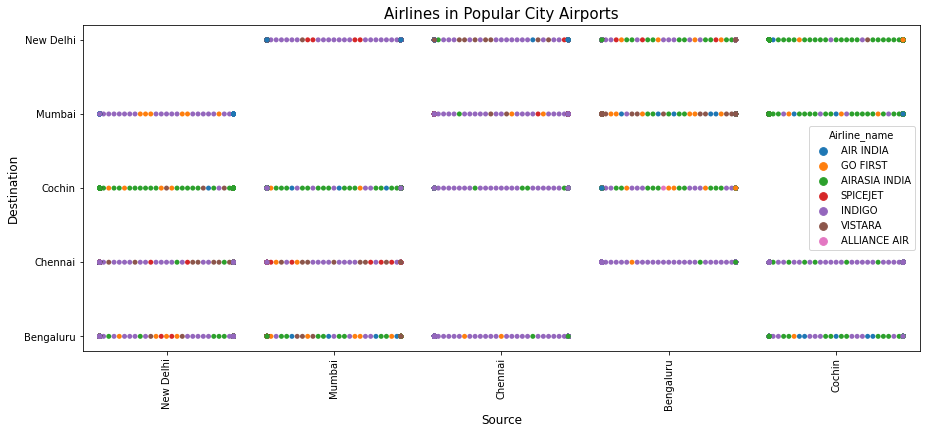

In [75]:
plt.figure(figsize = (15,6))
sns.swarmplot(x = 'Source',y = 'Destination', data = data, hue = 'Airline_name')
plt.xticks(rotation = 90)
plt.title("Airlines in Popular City Airports",fontsize=15)
plt.xlabel("Source",fontsize = 12)
plt.ylabel('Destination', fontsize = 12)
plt.show()

#### Observations:

* The flight ticket price is higher for the Vistara and Air India airlines while Spicejet and Alliance Air flights are having comparatively less flight fare.
* Flights fare is higher for flight which are taking off and landing in  Bengaluru and Cochin airports compared to other airports.
* The flight ticket price is higher for flights which are having one stop in between journey. 
* The flight ticket price is high during the start of a week and decreasing to week end. 

### Statistical Summary

### Describe of the Data

In [76]:
data.describe()

,Duration,Ticket_price,Day,Dep_time_hour,Dep_time_min,Arr_time_hour,Arr_time_min
count,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000
mean,315.497126,5852.737356,15.000000,13.157356,26.104023,14.034713,29.141954
std,454.339428,1733.682920,8.367081,5.866758,18.452366,6.453344,17.067180
min,60.000000,2812.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,4596.000000,8.000000,8.000000,10.000000,9.000000,15.000000
50%,165.000000,5534.000000,15.000000,13.000000,30.000000,14.000000,25.000000
75%,390.000000,7098.000000,22.000000,19.000000,45.000000,20.000000,45.000000
max,3300.000000,14178.000000,29.000000,23.000000,55.000000,23.000000,55.000000


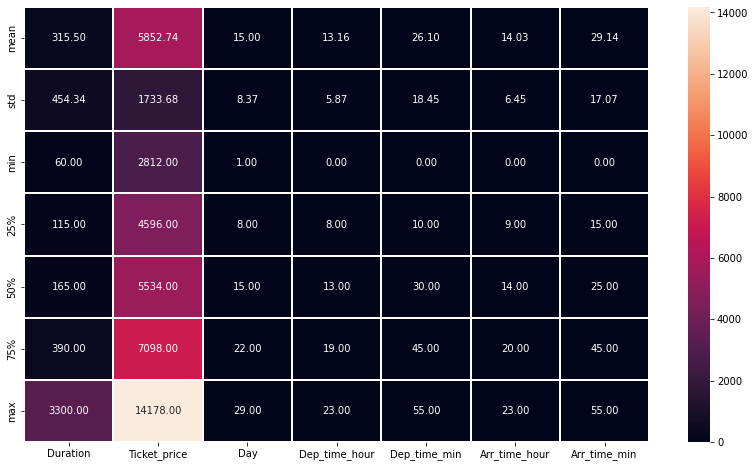

In [77]:
plt.figure(figsize=[14,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f',linewidths=0.1)
plt.show()

Observations: 
    
* All the columns except the columns ['Day', 'Dep_time_min'] are having higher mean value than the median. That means the distribution of values in these columns are not normal and skewness is present in the data distribution. 
* The max value of the columns ['Duration', 'Ticket_Price'] are having huge difference between the 75%. Possible outliers are present in the data of these columns.

In [78]:
numeric_columns = list(data.select_dtypes(["int64","float64"]))
categorical_columns = list(data.select_dtypes('O'))

### Encoding the Categorical Variables

In [79]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = onc.fit_transform(data[i].values.reshape(-1,1)).astype('int64')    #Ordinal Encoding for the features.

We have encoded the categorical columns of the dataset.

### Correlation

In [80]:
Correlation = data.corr()
Correlation

,Airline_name,Source,Destination,Duration,Total_stops,Ticket_price,Week_day,Day,Dep_time_hour,Dep_time_min,Arr_time_hour,Arr_time_min
Airline_name,1.000000,-0.087983,-9.352542e-02,-0.151613,0.258951,-0.125710,9.640971e-03,-4.467026e-02,-0.089859,0.062172,0.091252,0.107185
Source,-0.087983,1.000000,-2.601329e-01,-0.042927,0.020780,0.214695,1.376122e-03,-1.351843e-02,-0.014840,-0.016431,-0.019580,-0.076949
Destination,-0.093525,-0.260133,1.000000e+00,-0.129796,0.018794,0.197541,-2.333065e-16,-3.006387e-16,0.006886,0.025769,-0.103898,-0.020002
Duration,-0.151613,-0.042927,-1.297955e-01,1.000000,-0.338019,0.139878,1.018034e-02,-2.756175e-02,0.025147,-0.041690,0.029349,-0.001487
Total_stops,0.258951,0.020780,1.879383e-02,-0.338019,1.000000,-0.458598,-4.096984e-03,4.465081e-02,0.008066,0.048316,-0.043523,-0.010990
Ticket_price,-0.125710,0.214695,1.975415e-01,0.139878,-0.458598,1.000000,6.373553e-02,-3.748146e-01,-0.017314,0.060005,-0.001085,0.012615
Week_day,0.009641,0.001376,-2.333065e-16,0.010180,-0.004097,0.063736,1.000000e+00,-1.072222e-01,-0.003368,0.012895,0.002128,0.027681
Day,-0.044670,-0.013518,-3.006387e-16,-0.027562,0.044651,-0.374815,-1.072222e-01,1.000000e+00,0.005520,-0.022080,-0.011365,-0.016345
Dep_time_hour,-0.089859,-0.014840,6.885713e-03,0.025147,0.008066,-0.017314,-3.367996e-03,5.519733e-03,1.000000,-0.016126,0.286688,-0.026142
Dep_time_min,0.062172,-0.016431,2.576882e-02,-0.041690,0.048316,0.060005,1.289469e-02,-2.208018e-02,-0.016126,1.000000,-0.096342,0.097649


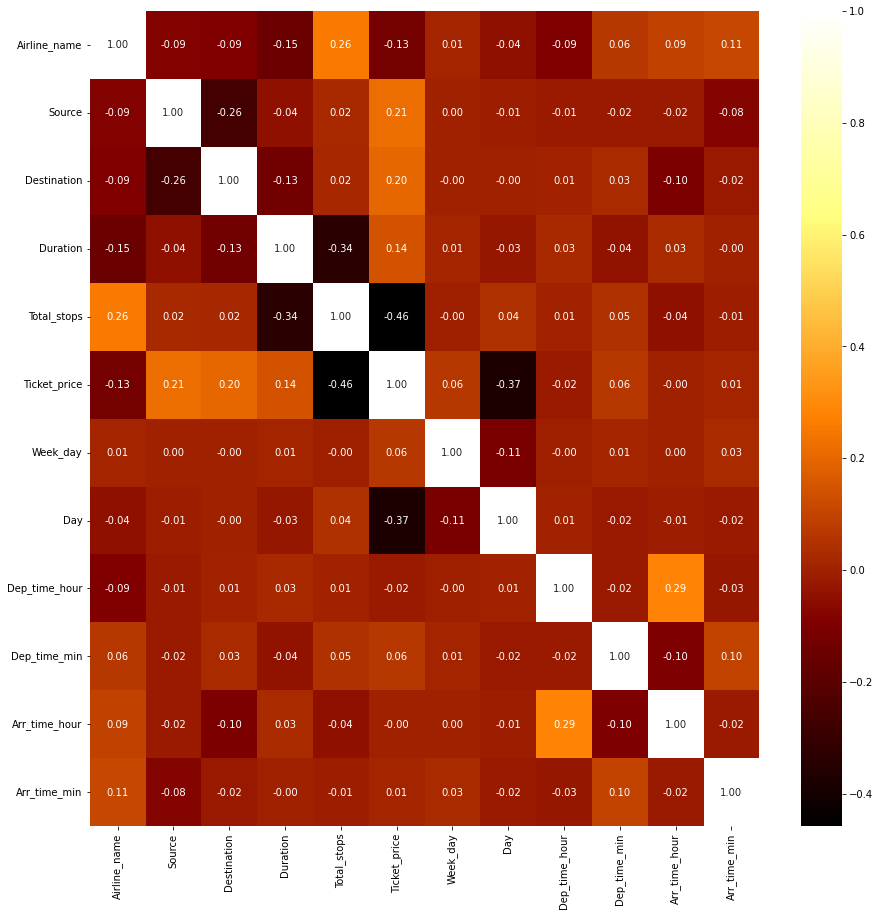

In [81]:
#Plotting the correlation of columns
plt.figure(figsize=[15,15])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='afmhot')
plt.show()

Most of the columns are having moderate to least correlation to each other.

### Correlation with the Target Variable

Source           0.214695
Destination      0.197541
Duration         0.139878
Week_day         0.063736
Dep_time_min     0.060005
Arr_time_min     0.012615
Arr_time_hour   -0.001085
Dep_time_hour   -0.017314
Airline_name    -0.125710
Day             -0.374815
Total_stops     -0.458598
Name: Ticket_price, dtype: float64


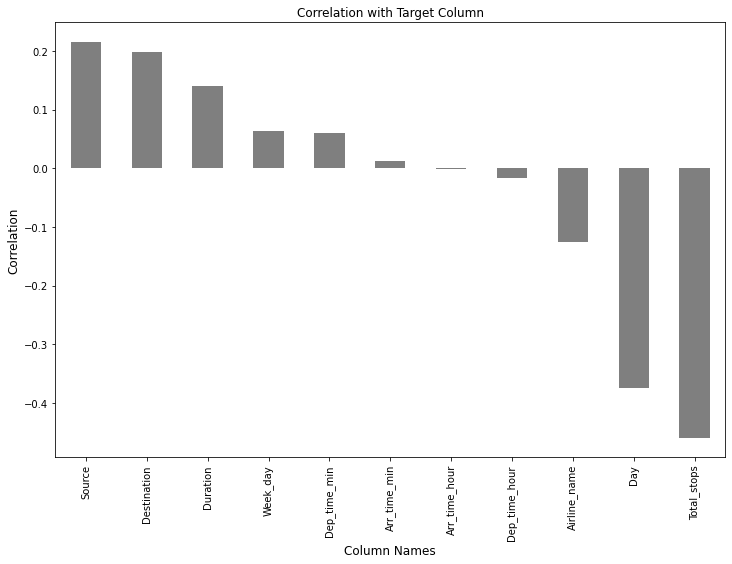

In [82]:
print(Correlation['Ticket_price'].drop('Ticket_price').sort_values(ascending = False))
plt.figure(figsize = [12,8])
plt.subplot()
Correlation['Ticket_price'].sort_values(ascending= False).drop('Ticket_price').plot(kind = 'bar', color ='tab:gray')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:
    
* The columns ['Source', 'Destination', 'Duration', 'Week_day', 'Dep_time_min', 'Arr_time_min'] are positively correlated to the target variable 'Ticket_price', while the rest of the columns in the dataset are having negative correlation to the target variable 'Ticket_price'.
* The column 'Source' is having highest positive correlation to the target variable whereas the column 'Total_stops' is having highest negative correlation to the target variable 'Ticket_price'.
* The column 'Arr_time_min' is having the least positive correlation to the target variable 'Ticket_price', while the column 'Arr_time_hour' is having the least negative correlation to the target variable 'Ticket_price'.

### Distribution of Data in Columns

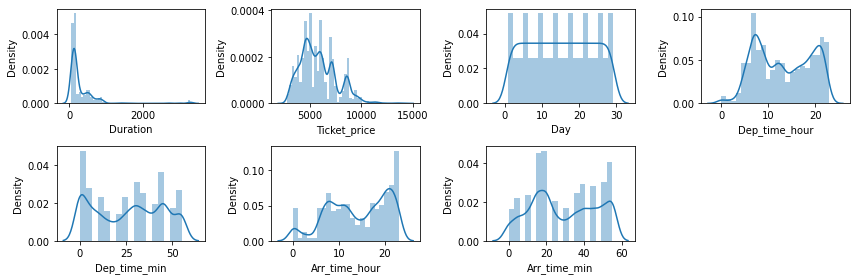

In [83]:
#Skewness of Numerical columns

plt.figure(figsize = [12,4])
for i in range(0,len(numeric_columns)):
    plt.subplot(2,4,i+1)
    sns.distplot(data[numeric_columns[i]])
    plt.tight_layout()

Observations:
    
* The columns except the column 'Day' are not having normal distributions.
* Skewness is present in the data of all numerical columns except the column 'Day'.

### Skewness

In [84]:
Skewness = data[numeric_columns].skew()
Skewness.sort_values(ascending = False)

Duration         4.668500
Ticket_price     0.762208
Arr_time_min     0.052444
Dep_time_hour    0.026863
Day              0.000000
Dep_time_min    -0.014145
Arr_time_hour   -0.338474
dtype: float64

Observations:
    
* Higher positive skewness is present in the data of column 'Duration'. 
* No skewness is present in the data of column 'Day'.
* Highest negative skewness is present in the column 'Arr_time_hour'.
* The column 'Ticket_price' is our target variable.

### Checking the Presence of Outliers in Data

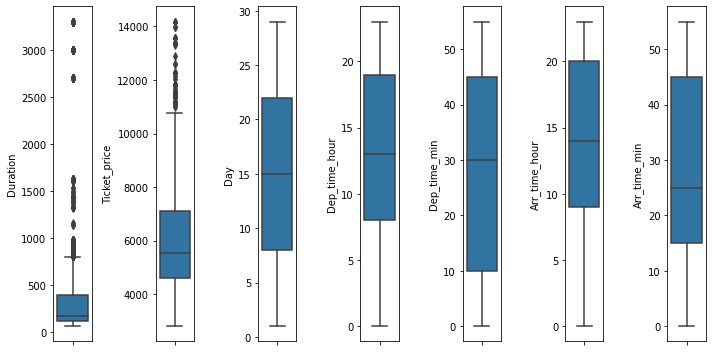

In [85]:
#Plotting the data of numerical columns with boxplot to check the outliers
plt.figure(figsize = [10,5])
for i in range(0,len(numeric_columns)):
    plt.subplot(1,7,i+1)
    sns.boxplot(y = data[numeric_columns[i]])
    plt.tight_layout()

Observations:
    
* The columns ['Duration', 'Ticket_price'] are having outliers present in the data.
* The column 'Ticket_price' is our target variable, so we will not consider the outliers in this column as it is required for building our model.

### Data Cleaning

### Removing Skewness

In [102]:
x = data.drop('Ticket_price',axis = 1)
y = data['Ticket_price']
print(x.shape)
print(y.shape)

(8700, 11)
(8700,)


In [103]:
#We can set the skewness standard limit as +/-0.5.
x.drop(categorical_columns,axis =1).skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

Duration    4.6685
dtype: float64

The column 'Duration' is having higher skewness than the standard limit. So we can remove the skewness of data from this column.

In [104]:
from sklearn.preprocessing import power_transform
x['Duration'] = power_transform(x['Duration'].values.reshape(-1,1))

In [105]:
x.drop(categorical_columns,axis =1).skew().sort_values(ascending = False)

Duration         0.097467
Arr_time_min     0.052444
Dep_time_hour    0.026863
Day              0.000000
Dep_time_min    -0.014145
Arr_time_hour   -0.338474
dtype: float64

We have reduced the skewness of the column 'Duration'.

### Removing the Outliers

#### Using ZScore method

In [106]:
from scipy.stats import zscore
df = pd.DataFrame({})
df = x.drop(categorical_columns,axis = 1).copy()   #removing the categorical column from the dataset before removing outliers.
z = np.abs(zscore(df))
z

,Duration,Day,Dep_time_hour,Dep_time_min,Arr_time_hour,Arr_time_min
0,0.163814,1.67332,0.538208,1.414752,0.315314,0.343254
1,0.312474,1.67332,1.336870,0.601801,1.389327,0.343254
2,0.367199,1.67332,0.143638,1.414752,0.304555,0.828653
3,1.283021,1.67332,1.390517,0.330818,0.149588,1.121630
4,0.968853,1.67332,0.655024,1.143769,1.389327,1.515161
...,...,...,...,...,...,...
8695,1.517912,1.67332,1.507332,1.566067,2.174922,1.414606
8696,0.260479,1.67332,0.314100,0.211149,0.459523,1.515161
8697,1.837820,1.67332,1.390517,1.024100,1.245118,0.929208
8698,1.414093,1.67332,1.166409,0.872785,1.090151,1.222185


In [107]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new[categorical_columns] = x[categorical_columns]
df_new['Ticket_price'] = y.copy()
df_new

,Duration,Day,Dep_time_hour,Dep_time_min,Arr_time_hour,Arr_time_min,Airline_name,Source,Destination,Total_stops,Week_day,Ticket_price
0,-0.163814,1,10,0,12,35,0,4,3,2,1,5955
1,-0.312474,1,21,15,23,35,0,4,3,2,1,5955
2,-0.367199,1,14,0,16,15,0,4,3,2,1,5955
3,1.283021,1,5,20,15,10,3,4,3,0,1,7108
4,0.968853,1,17,5,23,55,3,4,3,0,1,7108
...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.517912,29,22,55,0,5,1,2,0,2,1,3494
8696,-0.260479,29,15,30,17,55,2,2,0,0,1,3494
8697,-1.837820,29,5,45,6,45,4,2,0,2,1,4123
8698,1.414093,29,20,10,7,50,0,2,0,0,1,9059


In [108]:
df[categorical_columns] = x[categorical_columns]
df['Ticket_price'] = y.copy()
df.shape

(8700, 12)

In [109]:
df_new.shape

(8700, 12)

After reducing the skewness we are not having any outlier data in the dataset. 

### Checking the Multicolnearity of Variables in the DataFrame

In [116]:
x = df.drop('Ticket_price',axis = 1)
y = df['Ticket_price']
c = x.columns
print(x.shape)
print(y.shape)

(8700, 11)
(8700,)


#### Scaling the dataset

In [117]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#User defined function to calculate variance of inflation in dataset.
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by ='VIF Factor', ascending = False))

In [120]:
calc_vif(x)

,Column Name,VIF Factor
0,Duration,2.667756
9,Total_stops,2.635722
7,Source,1.228518
8,Destination,1.174500
6,Airline_name,1.149210
4,Arr_time_hour,1.138275
2,Dep_time_hour,1.110947
5,Arr_time_min,1.030024
3,Dep_time_min,1.025358
1,Day,1.018179


We can see that the variance of inflation is least for the columns. That means there is not much multicolinearity present between the variables in the dataset.

In [121]:
#Steps performed till now
#1. Imported the dataset
#Exploratory Data Analysis
#2. Checked the shape, datatypes and number of non-null values in the dataset.
#3. Decribed the features and target variables in the dataset
#4. Explored the categorical variables in the dataset
    #Extracted week day and day of month from the column 'Date_of_journey' and added to dataframe as new columns. 
    #Extracted hour and minute from the columns ['Dep_time', 'Arr_time'] and added to dataframe as new columns.
    #Dropped the columns Date_of_journey', 'Dep_time', 'Arr_time'] from the dataset.
    #Converted the duration of journey into minutes in the column 'Duration'
#5. Checked for missing values in the dataset
#6. Data Visualization:
    #Univariate Analysis - Using histogram plot and countplot
    #Bivariate and Multivariate Analysis - Using regplot, scatterplot, lineplot, swarmplot.
    #Analysed and drawn observations from the data.
#7. Statiscal Summary - Describe of the data
#8. Encoded the categorical variables in the dataset using ordinal encoder.
#9. Correlation of the variables in the dataset.
#10. Correlation of variables with the target variable
#11. Checked the distribution of the data in numerical columns
#12. Checked the skewness of data
#13. Checked the presence of outliers in the data of numerical columns
#Data Cleansing
#14. Removed Skewness
#15. Removed outliers
#16. Scaled the data using standard scaler
#17. Checked for the multicolinearity of variables in the dataset using variance of inflation factor.

### EDA Completed

### Building the Model

#### Splitting the data into features and target

In [122]:
features = x.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(8700, 11)
(8700,)


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split

In [149]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
sgd = SGDRegressor()
etr = ExtraTreesRegressor()
xgb = XGBRegressor()
lgbmr = LGBMRegressor()
cbr = CatBoostRegressor(verbose=0, n_estimators=100)

#### Finding the best random_state

In [133]:
#User defined function for finding the best random state
def best_ran(model):
    maxacc = 0
    maxrs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = r2_score(target_test,pred_test)
        if acc>maxacc:
            maxacc = acc
            maxrs = i
    print("At random state ", maxrs, 'the model is having r2 score of ', maxacc)

In [134]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    acc = r2_score(target_test,pred_test)
    mse = mean_squared_error(target_test,pred_test)
    mae = mean_absolute_error(target_test,pred_test)
    print("R2 score is ", acc)
    print("_"*50)
    print("Mean Sqaured Error is ",mse)
    print("_"*50)
    print("Mean Absolute Error is ",mae)
    print("_"*50)

#### LinearRegression

In [135]:
best_ran(lr)

LinearRegression()
At random state  97 the model is having r2 score of  0.527009516175881


In [136]:
mod_test(lr,97)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

LinearRegression()
R2 score is  0.527009516175881
__________________________________________________
Mean Sqaured Error is  1487823.3860520374
__________________________________________________
Mean Absolute Error is  878.2206749544725
__________________________________________________
Coefficent is  [ 523.10653695 -590.72066241   -8.84896411  128.45766926   19.18291727
   25.93514153   36.96868397  407.14767623  413.96665875 -395.61220262
   29.44912273]
__________________________________________________
Intercept is  5843.46834689682
__________________________________________________


#### KNeighborsRegressor

In [137]:
best_ran(knn)

KNeighborsRegressor()
At random state  4 the model is having r2 score of  0.8476736785594783


In [138]:
mod_test(knn,4)

KNeighborsRegressor()
R2 score is  0.8476736785594783
__________________________________________________
Mean Sqaured Error is  441730.54232183914
__________________________________________________
Mean Absolute Error is  421.3079310344827
__________________________________________________


#### DecisionTreeRegressor

In [139]:
best_ran(dtr)

DecisionTreeRegressor()
At random state  8 the model is having r2 score of  0.9551207785810303


In [151]:
mod_test(dtr,8)

DecisionTreeRegressor()
R2 score is  0.9560811792433538
__________________________________________________
Mean Sqaured Error is  126264.02586206897
__________________________________________________
Mean Absolute Error is  108.40632183908046
__________________________________________________


#### RandomForestRegressor

In [140]:
best_ran(rfr)

RandomForestRegressor()
At random state  8 the model is having r2 score of  0.9696985780623101


In [152]:
mod_test(rfr,8)

RandomForestRegressor()
R2 score is  0.9697383109141254
__________________________________________________
Mean Sqaured Error is  87000.57577913284
__________________________________________________
Mean Absolute Error is  125.43368122605362
__________________________________________________


#### AdaBoostRegressor

In [141]:
best_ran(abr)

AdaBoostRegressor()
At random state  5 the model is having r2 score of  0.6632367610966359


In [153]:
mod_test(abr,5)

AdaBoostRegressor()
R2 score is  0.6332858519329794
__________________________________________________
Mean Sqaured Error is  1103702.4968724176
__________________________________________________
Mean Absolute Error is  890.0885705475964
__________________________________________________


#### GradientBoostingRegressor

In [142]:
best_ran(gbr)

GradientBoostingRegressor()
At random state  69 the model is having r2 score of  0.8976894085335864


In [154]:
mod_test(gbr,69)

GradientBoostingRegressor()
R2 score is  0.8976894085335864
__________________________________________________
Mean Sqaured Error is  312587.6736244026
__________________________________________________
Mean Absolute Error is  403.7299161452732
__________________________________________________


#### SGDRegressor

In [144]:
best_ran(sgd)

SGDRegressor()
At random state  97 the model is having r2 score of  0.5265663795506723


In [155]:
mod_test(sgd,97)

SGDRegressor()
R2 score is  0.5253409909956601
__________________________________________________
Mean Sqaured Error is  1493071.8442520385
__________________________________________________
Mean Absolute Error is  879.1301802163991
__________________________________________________


#### ExtraTreesRegressor

In [145]:
best_ran(etr)

ExtraTreesRegressor()
At random state  8 the model is having r2 score of  0.9740976461576605


In [156]:
mod_test(etr,8)

ExtraTreesRegressor()
R2 score is  0.974804219841895
__________________________________________________
Mean Sqaured Error is  72436.38564718391
__________________________________________________
Mean Absolute Error is  108.23430459770115
__________________________________________________


#### XGBRegressor

In [146]:
best_ran(xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
At random state  17 the model is having r2 score of  0.9692296414576231


In [157]:
mod_test(xgb,17)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
R2 score is  0.9692296414576231
__________________________________________________
Mean Sqaured Error is  95324.12949473114
__________________________________________________
Mean Absolute Error is  181.1027625774515
__________________________________________________


#### LGBMRegressor

In [147]:
best_ran(lgbmr)

LGBMRegressor()
At random state  69 the model is having r2 score of  0.9583050790946543


In [158]:
mod_test(lgbmr,69)

LGBMRegressor()
R2 score is  0.9583050790946543
__________________________________________________
Mean Sqaured Error is  127389.72711377613
__________________________________________________
Mean Absolute Error is  225.41025266676056
__________________________________________________


#### CatBoostRegressor

In [148]:
best_ran(cbr)

At random state  8 the model is having r2 score of  0.9636998893569437


In [159]:
mod_test(cbr,8)

R2 score is  0.9636998893569437
__________________________________________________
Mean Sqaured Error is  104360.68250619466
__________________________________________________
Mean Absolute Error is  211.60298710390592
__________________________________________________


After testing the data with the regression algorithms, most of the models are performing well and providing the best R2 Score. 

So let's check the cross validation for each model to find tbe best performing model.

### Cross Validation

In [160]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

#### LinearRegression

In [161]:
cross_val(lr,97)

LinearRegression()
At cv fold 5  the cv score is  0.07036419325235899 and the R2 score  is  0.527009516175881


#### KNeighborsRegressor

In [162]:
cross_val(knn,4)

KNeighborsRegressor()
At cv fold 6  the cv score is  0.3116648860583661 and the R2 score  is  0.8476736785594783


#### DecisionTreeRegressor

In [163]:
cross_val(dtr,8)

DecisionTreeRegressor()
At cv fold 5  the cv score is  0.3441344925813712 and the R2 score  is  0.9594829955818878


#### RandomForestRegressor

In [164]:
cross_val(rfr,8)

RandomForestRegressor()
At cv fold 5  the cv score is  0.29547815277943074 and the R2 score  is  0.9697482782184201


#### AdaBoostRegressor

In [165]:
cross_val(abr,5)

AdaBoostRegressor()
At cv fold 2  the cv score is  0.22613569274209 and the R2 score  is  0.6190540964323343


#### GradientBoostingRegressor

In [166]:
cross_val(gbr,69)

GradientBoostingRegressor()
At cv fold 7  the cv score is  0.4492890940990274 and the R2 score  is  0.8976894085335864


#### SGDRegressor

In [167]:
cross_val(sgd,97)

SGDRegressor()
At cv fold 5  the cv score is  0.06829978503296896 and the R2 score  is  0.5275310053010887


#### ExtraTreesRegressor

In [168]:
cross_val(etr,8)

ExtraTreesRegressor()
At cv fold 9  the cv score is  0.49297123686094024 and the R2 score  is  0.9747227889478558


#### XGBRegressor

In [169]:
cross_val(xgb,17)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
At cv fold 7  the cv score is  0.4802321705474825 and the R2 score  is  0.9692296414576231


#### LGBMRegressor

In [170]:
cross_val(lgbmr,69)

LGBMRegressor()
At cv fold 5  the cv score is  0.3826905302044449 and the R2 score  is  0.9583050790946543


#### CatBoostRegressor

In [171]:
cross_val(cbr,8)

At cv fold 9  the cv score is  0.46628797931931476 and the R2 score  is  0.9636998893569437


After testing the several algorithms and cross validations. Extra Tree, Xg boost and Catboost algorithms are performing well by providing the best score.

**The ExtraTree regressor algorithm(etr) is providing an R2 Score of 97.47% with a cross validation mean score of 50%.**

**The XGBoost regressor algorithm(xgb) is providing an R2 Score of 96.92% with a cross validation mean score of 48.02%.**

**The CatBoost regressor algorithm(cbr) is providing an R2 Score of 96.37% with a cross validation mean score of 46.62%.**

So we can consider these three models as the best performing models.

#### ExtraTree Regressor

In [172]:
etr = ExtraTreesRegressor()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 8)
etr.fit(features_train, target_train)
pred_test_etr = etr.predict(features_test)

cv_score = cross_val_score(etr,features, target, cv = 9)
cv_mean =cv_score.mean()
print("At cv fold",9," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_etr))

At cv fold 9  the cv score is  0.4919941852135121 and the R2 score  is  0.9740891669699766


#### XGBoost Regressor

In [174]:
xgb = XGBRegressor()
features_train, features_test,target_train,target_test = train_test_split(features, target, test_size = 0.20, random_state=17)
xgb.fit(features_train, target_train)
pred_test_xgb = xgb.predict(features_test)

cv_score = cross_val_score(xgb,features, target, cv = 7)
cv_mean =cv_score.mean()
print("At cv fold",7," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_xgb))

At cv fold 7  the cv score is  0.4802321705474825 and the R2 score  is  0.9692296414576231


#### CatBoost Regressor

In [175]:
cbr = CatBoostRegressor(verbose = 0, n_estimators=100)
features_train, features_test,target_train,target_test = train_test_split(features, target, test_size = 0.20, random_state=8)
cbr.fit(features_train, target_train)
pred_test_cbr = cbr.predict(features_test)

cv_score = cross_val_score(cbr,features, target, cv = 9)
cv_mean =cv_score.mean()
print("At cv fold",9," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_cbr))

At cv fold 9  the cv score is  0.46628797931931476 and the R2 score  is  0.9636998893569437


### Regularization

In [176]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

#### Lasso(L1)

In [177]:
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [178]:
ls = Lasso(alpha = 0.0001, random_state = 0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.4903414584081053

In [179]:
cross_val(ls,0)

Lasso(alpha=0.0001, random_state=0)
At cv fold 5  the cv score is  0.07036458248460671 and the R2 score  is  0.48989237620341886


### Ridge(L2)

In [180]:
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [181]:
rd = Ridge(alpha = 1,random_state=0)
rd.fit(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.490345950577325

In [182]:
cross_val(rd,0)

Ridge(alpha=1, random_state=0)
At cv fold 5  the cv score is  0.07084509752008901 and the R2 score  is  0.4898934948997812


### ElasticNet

In [183]:
en = ElasticNet()
clf = GridSearchCV(en,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [184]:
en = ElasticNet(alpha = 0.01, random_state = 0)
en.fit(features_train,target_train)
pred_en = en.predict(features_test)

ens = r2_score(target_test,pred_en)
ens

0.4904886443286951

In [185]:
cross_val(en,0)

ElasticNet(alpha=0.01, random_state=0)
At cv fold 5  the cv score is  0.08619348059523609 and the R2 score  is  0.48992260913781294


The regularization techniques didn't provide any better results. So we can consider the ExtraTree, CatBoost and XGBoost Regressor models as the best performing models.

### Hyperparameter Tuning

#### ExtraTree Regressor

In [188]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
parameters = {'n_estimators':[100,125,150,200],
             'criterion': ['squared_error','absolute_error'],
             'max_features': [None,'sqrt','log2'],
             'max_depth':[10,20,30,None]}

grid = HalvingGridSearchCV(estimator = ExtraTreesRegressor(),param_grid=parameters, cv = 9)

In [189]:
grid.fit(features,target)

HalvingGridSearchCV(cv=9, estimator=ExtraTreesRegressor(),
                    param_grid={'criterion': ['squared_error',
                                              'absolute_error'],
                                'max_depth': [10, 20, 30, None],
                                'max_features': [None, 'sqrt', 'log2'],
                                'n_estimators': [100, 125, 150, 200]})

In [190]:
grid.best_score_

0.4934526430504786

In [191]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 150}

In [192]:
etr = ExtraTreesRegressor(n_estimators=150,max_depth=None,max_features='log2',criterion='squared_error')
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 8)
etr.fit(features_train, target_train)
pred_test_etr = etr.predict(features_test)

print('R2 Score',r2_score(target_test,pred_test_etr))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_etr))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_etr))

R2 Score 0.949764962352134
Mean Squared Error 144422.77783135374
Mean Absolute Error 221.02344061302682


#### XGBoost Regressor

In [195]:
parameters = {'objective':['reg:squarederror','reg:squaredlogerror'],
             'base_score':[0.5,1,2],
             'eval_metric':['rmse','rmsle','mae'],
             'seed':[0,1,2],
             'seed_per_iteration':[True, False]}

grid = HalvingGridSearchCV(estimator = XGBRegressor(),param_grid=parameters, cv = 7)

In [196]:
grid.fit(features,target)

HalvingGridSearchCV(cv=7,
                    estimator=XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                    param_grid={'base_score': [0.5, 1, 2],
                                'eval_metric': ['rmse', 'rmsle', 'mae'],
                                'objective': ['reg:squarederror',
                                              'reg:squaredlogerror'],
                                'seed': [0, 1, 2],
                                'seed_per_iteration': [True, False]})

In [197]:
grid.best_score_

0.451804472852324

In [198]:
grid.best_params_

{'base_score': 1,
 'eval_metric': 'mae',
 'objective': 'reg:squarederror',
 'seed': 0,
 'seed_per_iteration': False}

In [199]:
xgb = XGBRegressor(base_score = 1,eval_metric = 'mae',objective = 'reg:squarederror',seed = 0,seed_per_iteration = False)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 17)
xgb.fit(features_train, target_train)
pred_test_xgb = xgb.predict(features_test)


print('R2 Score',r2_score(target_test,pred_test_xgb))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_xgb))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_xgb))

R2 Score 0.9692296741063277
Mean Squared Error 95324.02835163505
Mean Absolute Error 181.10267642667924


#### CatBoost Regressor

In [208]:
parameters = {'n_estimators' : [100,150,200,400],
              'eval_metric' : ['RMSE','Logloss', 'CrossEntropy', 'MAE'],
              'sampling_frequency' : ['PerTree ','PerTreeLevel'],
              'sampling_unit' : ['Object','Group']}

grid = GridSearchCV(estimator = CatBoostRegressor(verbose = 0),param_grid=parameters, cv = 9)

In [209]:
grid.fit(features,target)

GridSearchCV(cv=9,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001C139075310>,
             param_grid={'eval_metric': ['RMSE', 'Logloss', 'CrossEntropy',
                                         'MAE'],
                         'n_estimators': [100, 150, 200, 400],
                         'sampling_frequency': ['PerTree ', 'PerTreeLevel'],
                         'sampling_unit': ['Object', 'Group']})

In [210]:
grid.best_score_

0.4173356610286454

In [211]:
grid.best_params_

{'eval_metric': 'RMSE',
 'n_estimators': 100,
 'sampling_frequency': 'PerTreeLevel',
 'sampling_unit': 'Object'}

In [212]:
cbr = CatBoostRegressor(verbose = 0,n_estimators=100, eval_metric = 'RMSE',sampling_frequency = 'PerTreeLevel', sampling_unit = 'Object')
features_train, features_test,target_train,target_test = train_test_split(features, target, test_size = 0.20, random_state=8)
cbr.fit(features_train, target_train)
pred_test_cbr = cbr.predict(features_test)

print('R2 Score',r2_score(target_test,pred_test_cbr))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_cbr))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_cbr))

R2 Score 0.960920835817385
Mean Squared Error 112350.2979363361
Mean Absolute Error 214.66183577624165


After all the tests, cross validations, regularizations and hyperparameter tuning the XGBoost model is performing well. So we can consider this model as the best performing model.

### The XGBoost model(xgb) is providing a final R2 Score of 96.92%.

### Saving the best model

In [213]:
import pickle

filename = 'flight_ticket_price_prediction_model.pkl'
pickle.dump(xgb,open(filename,'wb'))

### Conclusion

In [214]:
original = np.array(target_test)
predicted = np.round(np.array(xgb.predict(features_test)))

prediction_test = pd.DataFrame({'Original Ticket Price':original,'Predicted Ticket Price':predicted})
prediction_test.sample(20)

,Original Ticket Price,Predicted Ticket Price
102,3208,3293.0
419,4018,3950.0
1424,5518,5480.0
319,3943,4427.0
1451,7116,7010.0
780,3975,4245.0
947,4505,4538.0
1588,3980,4201.0
403,9419,9386.0
1643,7022,6974.0


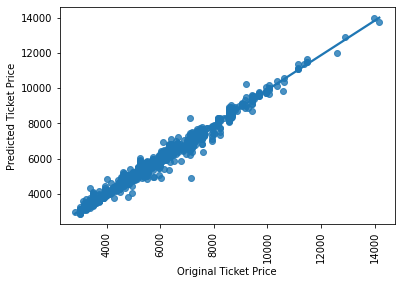

In [215]:
sns.regplot('Original Ticket Price','Predicted Ticket Price', data = prediction_test)
plt.xticks(rotation = 90)
plt.show()

Our model is performing well with predictions and provided almost accurate results.

Now this model can be used to predict the price of flight ticket price in India with the following variable information about the flight journey and flight.(Important Variables)


`Duration`    `Total_stops`    `Source`    `Destination`    `Airline_name`    `Arr_time_hour`    `Dep_time_hour`    `Arr_time_min`    `Dep_time_min`    `Day`    `Week_day`

#### Impact of Variables on Target Variable(Correlation)

* The columns ['Source', 'Destination', 'Duration', 'Week_day', 'Dep_time_min', 'Arr_time_min'] are positively correlated to the target variable 'Ticket_price', while the rest of the columns in the dataset are having negative correlation to the target variable 'Ticket_price'.
* The column 'Source' is having highest positive correlation to the target variable whereas the column 'Total_stops' is having highest negative correlation to the target variable 'Ticket_price'.
* The column 'Arr_time_min' is having the least positive correlation to the target variable 'Ticket_price', while the column 'Arr_time_hour' is having the least negative correlation to the target variable 'Ticket_price'.

### Successfully created flight ticket price prediction model.